# 作業1：

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：
1. 你選的這組資料為何重要
2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
3. 蒐集而來的資料型態為何
4. 這組資料想解決的問題如何評估

我選的資料是 <br />
Google Play Store Apps
Web scraped data of 10k Play Store apps for analysing the Android market.

1. 你選的這組資料為何重要

近年來App一直都是一個很重要的新興平台，許多人都期望藉由寫出一個受歡迎的App致富，而Google Play Store又佔據了App市場一半以上的空間，大部分新創App也由此發跡，所以我們可以藉由這份資料大概推測，什麼樣的類型，價錢可以使最多人下載，而下載量是否於高評價正相關。

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

提供者是 Lavanya Gupta <br /> 
用Python的scrapy 在Google Play Store上爬蟲取得


3. 蒐集而來的資料型態為何

資料為 .csv擋

In [3]:
import pandas as pd
df = pd.read_csv('../data/google-play-store-apps/googleplaystore.csv')
dfUR = pd.read_csv('../data/google-play-store-apps/googleplaystore_user_reviews.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
dfUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


4. 這組資料想解決的問題如何評估

ROC / MAP@N(eg. MAP@5, MAP@12)

# 作業2：

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：
1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
3. 蒐集而來的資料型態為何
4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

既然是自由載客車隊，那業績莫過於是載客量了，所以什麼東西會影響載客量呢，有可能是價錢，區域內車子的數量，司機的素質，車子的設備。

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

可藉由行車記錄器得知載客的時間，地點，里程數及路線 <br/>
用問卷的方式請乘客對這趟旅程做評論

3. 蒐集而來的資料型態為何

價錢，里程為數字型資料 <br/>
所有評價則皆為類別型資料 <br/>
剩下的地點，路線則為字串型資料

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

載客量為數字型態，可進行迴歸找出關係，可用MAE, RMSE進行評估

# 作業3：

請點選下方檢視範例依照 Day_001_example_of_metrics.ipynb 完成 Mean Squared Error 的函式

練習時間
請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def mean_squared_error(y,yp):
    mse = sum(abs(y - yp)**2) / len(y)
    return mse

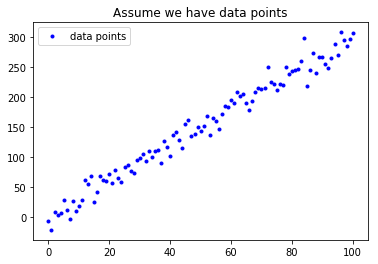

In [10]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

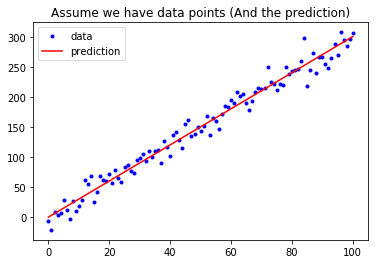

In [11]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [12]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 194.818
The Mean absolute error is 10.955


In [13]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 10.955
